<h1><center><font size="6">Default of Credit Card Clients - Predictive Models</font></center></h1>



# Contents

- Introduction  
- Load packages 
- Read the data
- Check the data 
    - Glimpse the data
    - Check missing data
    - Check data imbalance
- Data exploration
- Predictive models
    - RandomForrestClassifier
- Conclusions


Defaulting the credit card means failing to pay at least the minimum payment on statement balance over an extended period of time.

In [42]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('credit card clients.csv',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape

(30000, 25)

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

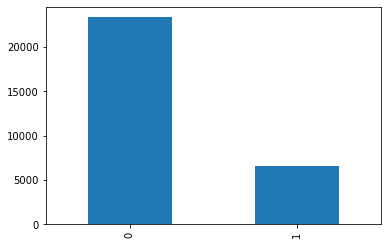

In [8]:
data['default payment next month'].value_counts(0).plot.bar()
data['default payment next month'].value_counts(normalize=True)

6636 customers are going to default the payment in upcoming month.

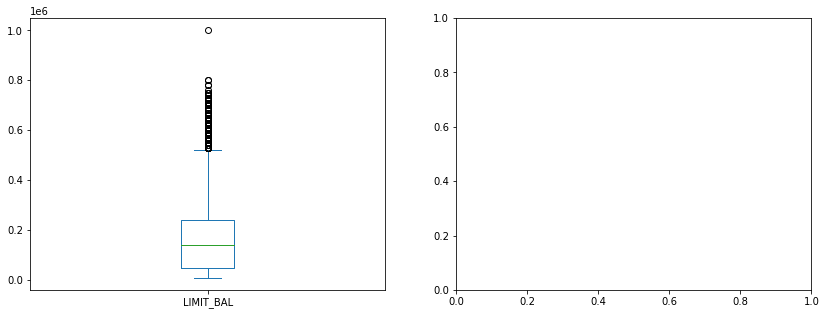

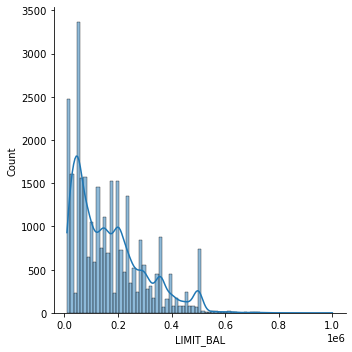

In [9]:
plt.figure(1)
plt.subplot(121)
data['LIMIT_BAL'].plot.box(figsize=(14,5))
plt.subplot(122)
sns.displot(data['LIMIT_BAL'],kde=True)

<AxesSubplot:>

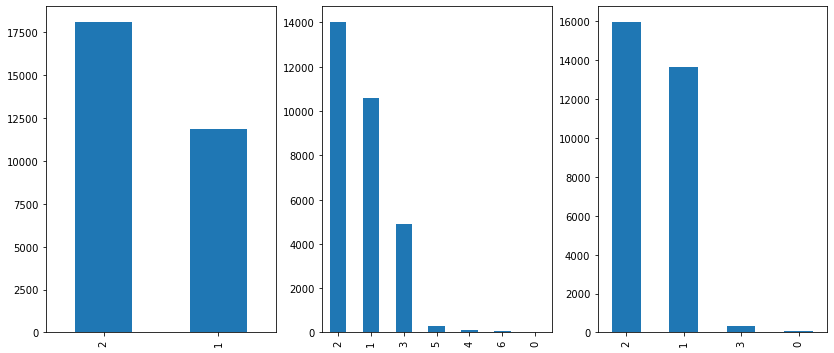

In [10]:
plt.figure(1)
plt.subplot(131)
data['SEX'].value_counts(0).plot.bar(figsize=(14,6))
plt.subplot(132)
data['EDUCATION'].value_counts(0).plot.bar()
plt.subplot(133)
data['MARRIAGE'].value_counts(0).plot.bar()

In [11]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [12]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='SEX'>

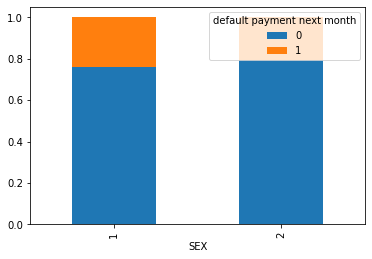

In [13]:
sex=pd.crosstab(data['SEX'],data['default payment next month'])
sex.div(sex.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='EDUCATION'>

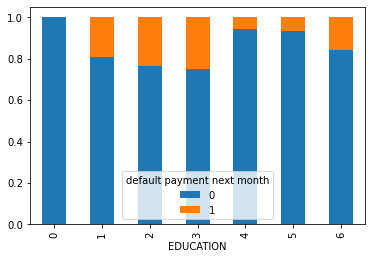

In [14]:
education=pd.crosstab(data['EDUCATION'],data['default payment next month'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

In [15]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:xlabel='MARRIAGE'>

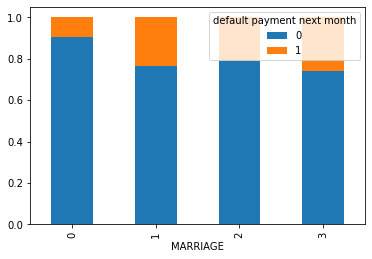

In [16]:
marriage=pd.crosstab(data['MARRIAGE'],data['default payment next month'])
marriage.div(marriage.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [17]:
data['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

In [18]:
#the largest number of credit cards are with credit limit 50k

# credit limit grouped by default payment next month

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

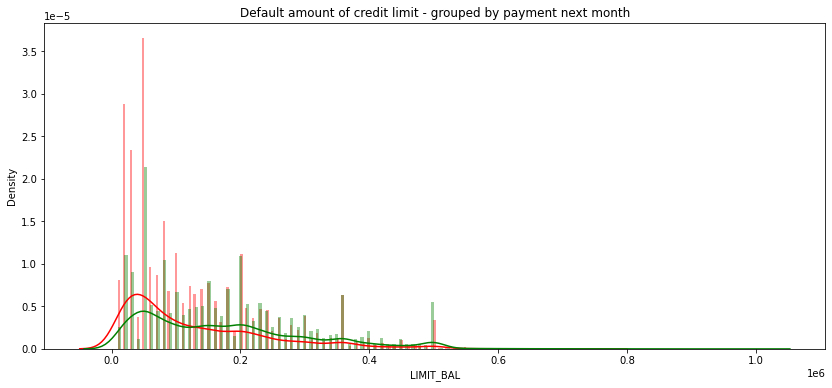

In [19]:
class_0=data.loc[data['default payment next month']==0]['LIMIT_BAL']
class_1=data.loc[data['default payment next month']==1]['LIMIT_BAL']
plt.figure(figsize=(14,6))
plt.title('Default amount of credit limit - grouped by payment next month')
sns.set_color_codes('pastel')
sns.distplot(class_1,kde=True,bins=200,color='red')
sns.distplot(class_0,kde=True,bins=200,color='green')
plt.show

# credit limit vs sex

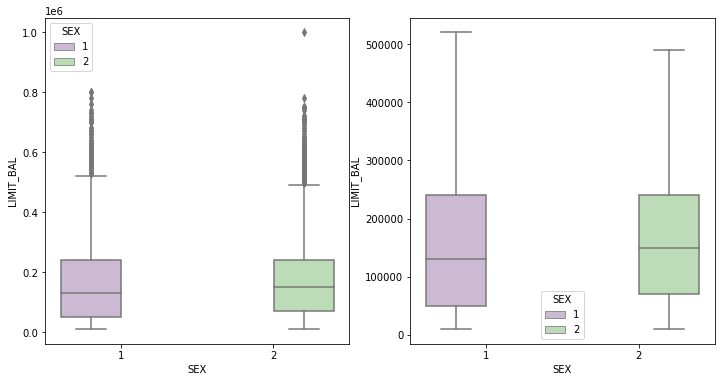

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))
s=sns.boxplot(ax=ax1, x='SEX', y='LIMIT_BAL', hue='SEX', data=data, palette='PRGn')
s=sns.boxplot(ax=ax2, x='SEX', y='LIMIT_BAL', hue='SEX', data=data, palette='PRGn', showfliers=False)

# Feature corelation

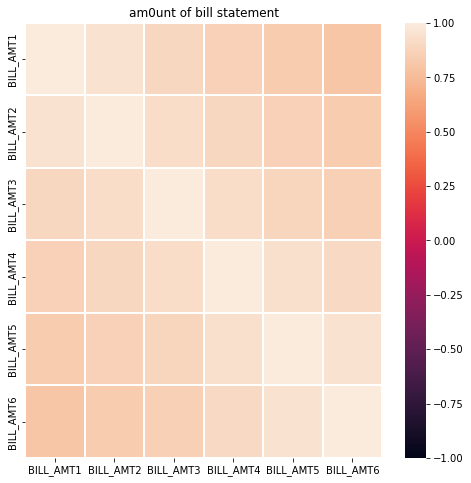

In [21]:
var=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(8,8))
plt.title('am0unt of bill statement')
corr=data[var].corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1)
plt.show()


<AxesSubplot:title={'center':'amount of previous payment corelation plot'}>

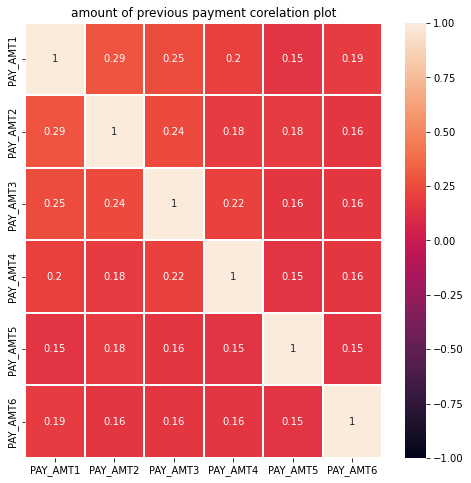

In [22]:
var=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize=(8,8))
plt.title('amount of previous payment corelation plot')
corr=data[var].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, annot=True)

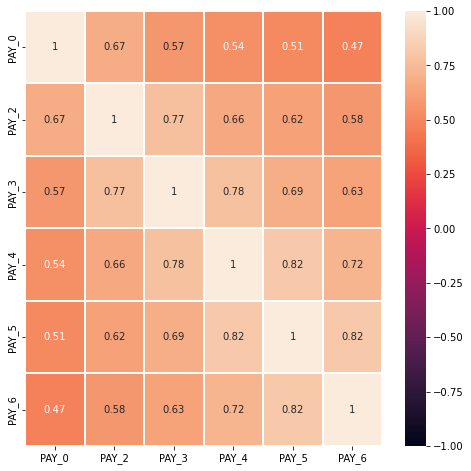

In [23]:
var=['PAY_0','PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']
corr=data[var].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1, vmin=-1,annot=True)
plt.show()

# sex,education, age and marriage

In [24]:
def boxplot_variation(feature1, feature2, feature3,width=16):
    fig,ax1=plt.subplots(ncols=1, figsize=(width,6))
    s=sns.boxplot(ax=ax1,x=feature1, y=feature2,hue=feature3, data=data,palette="PRGn", showfliers=False)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()

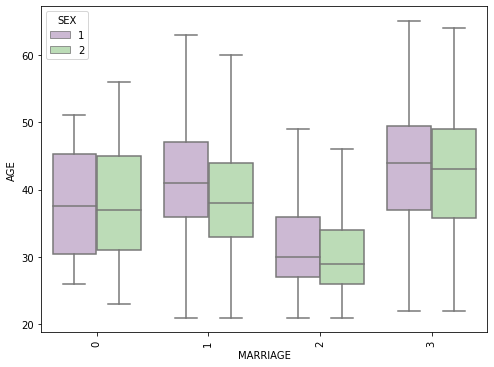

In [25]:
boxplot_variation('MARRIAGE','AGE','SEX',8)

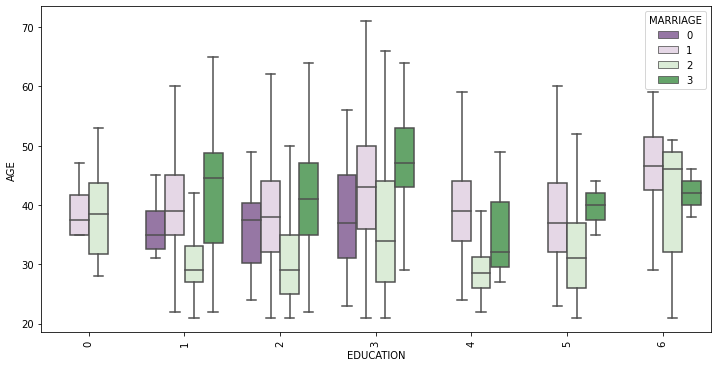

In [26]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

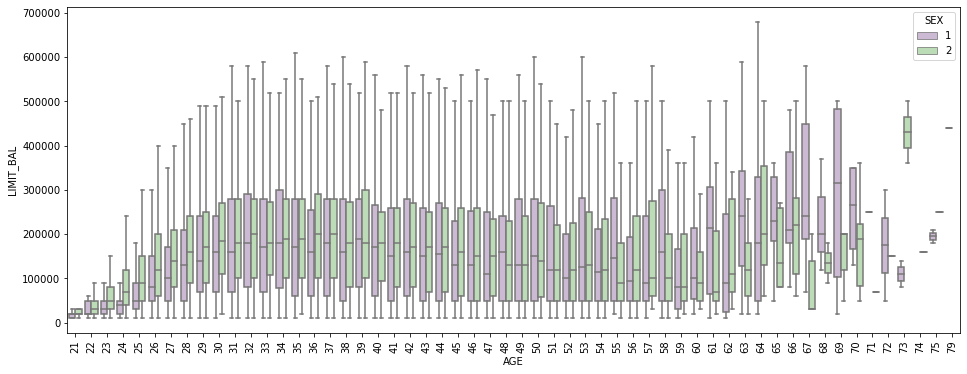

In [27]:
boxplot_variation('AGE','LIMIT_BAL','SEX',16)

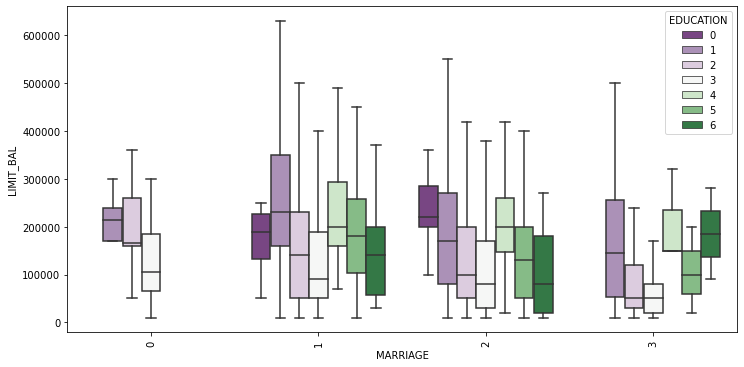

In [28]:
boxplot_variation('MARRIAGE', 'LIMIT_BAL', 'EDUCATION',12)

# Building the predictive model

In [29]:
y=data['default payment next month']
x=data.drop(columns=['ID','default payment next month'])

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=42, shuffle=True)

In [32]:
#train_df_bkp=train_df.copy()
#val_df_bkp=val_df.copy()

# Randomforest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=-1, random_state=42, criterion='gini', n_estimators=350, verbose=False)

In [34]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=350, n_jobs=-1, random_state=42,
                       verbose=False)

In [57]:
predictions=clf.predict(xtest)
predictions.size, ytest.size

(7500, 7500)

In [39]:
#clf.score(ytest,predictions)
#train_df, val_df = train_test_split(data, test_size=0.25, random_state=42, shuffle=True )
#predictors = train_df.drop(columns=['default payment next month']).columns.values
#predictors

# Feature Importance

In [46]:
'''
tmp=pd.DataFrame({'Feature':predictors, 'Feature importance': clf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize=(7,4))
plt.title('feture importance',fontsize=14)
s=sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()'''

"\ntmp=pd.DataFrame({'Feature':predictors, 'Feature importance': clf.feature_importances_})\ntmp=tmp.sort_values(by='Feature importance', ascending=False)\nplt.figure(figsize=(7,4))\nplt.title('feture importance',fontsize=14)\ns=sns.barplot(x='Feature', y='Feature importance', data=tmp)\ns.set_xticklabels(s.get_xticklabels(), rotation=90)\nplt.show()"

<BarContainer object of 23 artists>

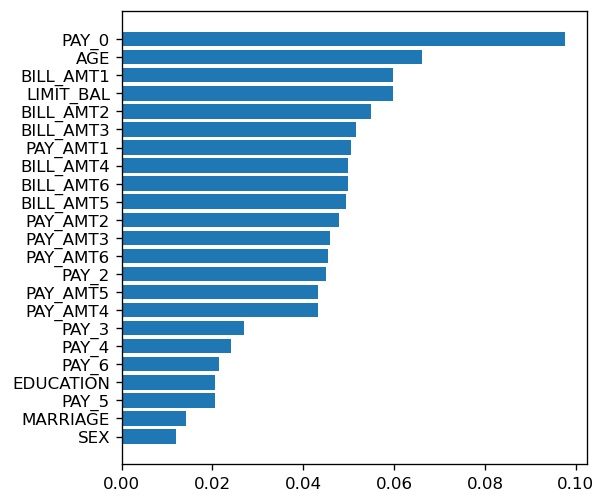

In [45]:
feature_imp=pd.Series(clf.feature_importances_, index=x.columns)
k=feature_imp.sort_values()
plt.figure(figsize=(5,5),dpi=120)
plt.barh(k.index, k)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.63      0.36      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.79      0.81      0.80      7500



In [59]:
#print(clf.score(ytest,predictions))

In [63]:
predicted_probabilities=clf.predict_proba(xtest)
predicted_probabilities[:,1]

array([0.22857143, 0.12571429, 0.28      , ..., 0.27142857, 0.18285714,
       0.23142857])

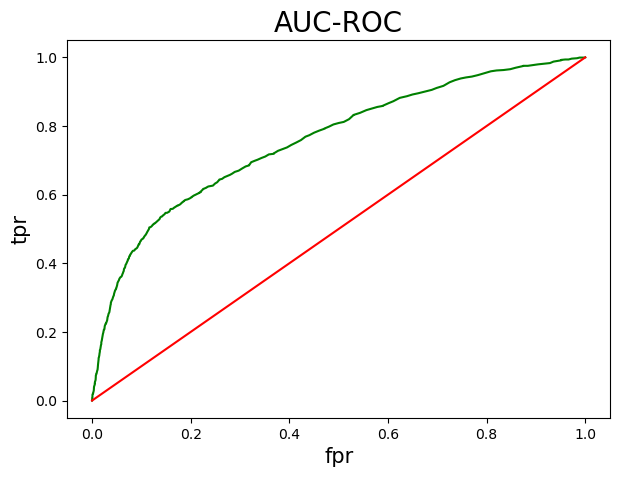

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(ytest,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr, color='green')
plt.plot([0,1],[0,1], label='baseline', color='red')
plt.xlabel('fpr',fontsize=15)
plt.ylabel('tpr',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()

In [65]:
roc_auc_score(ytest,predictions)

0.6512625203144912

In [ ]:
#AUC-ROC score value of 0.65 indicates model is built gives good reults